# Stellar Mass

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import fsps

In [14]:
### Constant SFH, Kroupa IMF, solar metallicity
sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=1, const=1, zmet=10, imf_type=2, sf_trunc=13.7)

In [15]:
SFR = sp.sfr
print(SFR[0])

7.29927007299e-11


In [16]:
masses = []
mags = []
ages = np.linspace(1.,13.7,num=20)
for i in range(len(ages)):
    sp.params['tage'] = ages[i]
    mass = sp.stellar_mass
    masses.append(mass)
    M_ab = sp.get_mags(tage=ages[i], bands=['b'])
    mags.append(M_ab[0])
    

In [17]:
### convert to luminosity

# constants
L_sun = 3.846 * 10**33 # erg/s
pc = 3.085677581467192 * 10**18 # cm
m_ab0 = -2.5 * np.log10(3631 * 10**(-23)) # AB magnitude zero point
h = 6.6260755 * 10**(-27) # erg s
c = 2.99792458 * 10**18 # angstrom/s

# get filter
b = fsps.get_filter('b')

# compute frequency
b_freq = c / b.lambda_eff

# area correspoding to d=10pc
A = 4 * np.pi * (10*pc)**2

# flux
f_B = 10**(-0.4*(mags+m_ab0))

# luminosity
L_B =  A * f_B

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(L_B),np.log10(masses))

In [21]:
print(slope, intercept, r_value, p_value, std_err)

(0.072909210643423386, -1.5429471056583883, 0.99891178413359993, 2.0243178638266535e-25, 0.00080236753520421006)


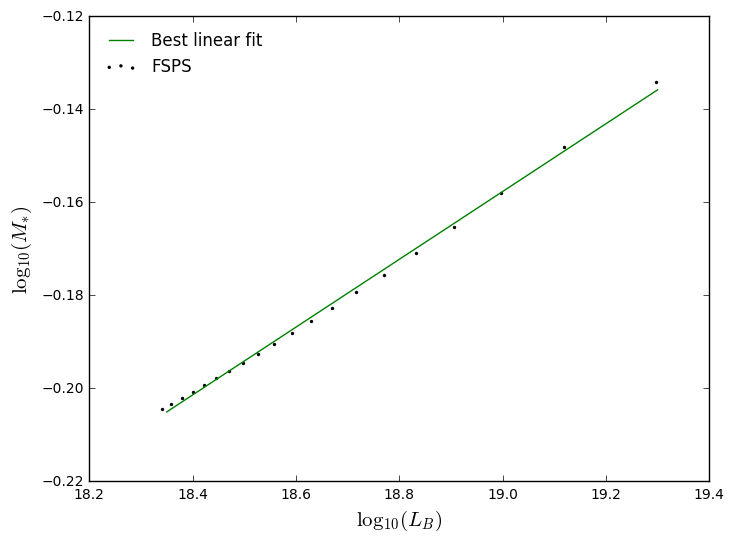

In [24]:
fig = plt.figure(figsize=(8,6))
plt.scatter(np.log10(L_B), np.log10(masses), s=2, label=r'FSPS')
plt.plot(np.linspace(18.35,19.3,30),slope*np.linspace(18.35,19.3,30)+intercept,c='g',label='Best linear fit')
plt.ylabel(r'$\log_{10}(M_{*})$', fontsize=15)
plt.xlabel(r'$\log_{10}(L_B)$', fontsize=15)
plt.legend(loc=2,frameon=False)
plt.show()

B-band magnitudes are not a good proxy because they are more sensitive to dust (which is poorly understood to begin with) and recent star formation than redder band magnitudes.